# k-NN analysis
**Note: This assignment is not for the BSc cognitive science students (5DV201)**

In this assignment, we will investigate how the **k-nearest neighbor-algorithm works**. The purpose is to train a k-NN classifier on two given datasets and investigate how increasing $k$ affects the performance of the classifier, and the relationship between the training error and the test error.

You have been given code that you need to extend in order to answer these questions.

For each dataset, the questions that you must answer in your report are listed below. You should run the entire procedure twice. Once using a test set of **33%** and once using a test set of **66%**. Describe the results and how they relate to the terms under-/overfitting.

1. For the given dataset, what seems to be an optimal k value? Are there more than one? If so, which should you choose?
2. What type of learning is this? (Super-/unsupervised or reinforcement learning, multiclass, regression or ranking, et c.)
3. Based on your plots, describe the relationship between the training and test error.

In addition to this, you should choose two out of the four features in the Iris dataset, and 10 out of the 30 features in the breast cancer dataset to use in your experiments. It does not need to be the two features that makes for the best predictors but it is encouraged for you to find these two. **You should investigate $k$ values up to 30**.

It is not necessary that you produce the best classifier possible, but that you experiment with the classifier to understand the concepts. If you are unable to answer the question on finding an optimal value k (i.e., if the classifier never seems to perform well), reason as to why this might be. The same thing applies to the other questions.

## Working together

The assignment should be solved in **groups of two**. Copying code from other students, the internet, or other sources is not allowed (the provided helper code excluded).

## Workshop

There will be a **virtual** lab session where we will work on the assignment together.

## The datasets

You will perform experiments on two datasets; the Iris dataset, and a breast cancer dataset. The datasets differ in the size and the number of features. This can lead to different answers to the questions (i.e., do not expect the k value to be the same for each dataset).

### Iris
The Iris dataset contains data on three classes of flowers. There are 150 samples, where each sample has 4 features related to the petal and sepal length/width.

You can read more about it on [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set) and [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html).

### Breast cancer
The breast cancer dataset contains data from patient diagnostic situations, where each data point is either a case of cancer or not. There are 569 samples, where each sample has 30 features related to the structure of cell nuclei such as radius, smoothness et c.
You can read more about it on [Sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) and [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

## Getting started
To get started follow [these instructions](https://jupyter.org/install) to install Jupyter. Note that Jupyter requires Python 3.
Then, proceed as follows:

1. Start Jupyter.
2. Download this notebook (click the button in the top-right corner)
2. Upload the notebook to your Jupyter environment (use *one of the buttons* in the top-right corner of your Jupyter environment).
3. Open the notebook.

Alternatively, you can use [Google Colab](https://colab.research.google.com) to work on the assignment "in the cloud".

## Working in the notebook
Now, it is time to start working directly in the notebook.
Execute the cell below to install all dependencies (you can remove the ``%%capture`` statement for debugging purposes):

In [1]:
%%capture
!pip install --user -U scikit-learn scipy numpy matplotlib

First, we import all dependencies we need for this assignment:

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import *
import matplotlib.pyplot as plt

Now, we implement an k-NN training function and **properly document the function signature**:

In [3]:
def train_knn(x_train, y_train, k):
    """
    Given training data (input and output), train a k-NN classifier.

    Input:    x/y_train - Two arrays of equal length, one with input data and 
              one with the correct labels. 
              k - number of neighbors considered when training the classifier.
    Returns:  The trained classifier
    """
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    return knn

We do the same for the evaluation function:

In [23]:
def evaluate_knn(knn, x_train, y_train, x_test, y_test):
    """
    Given a trained classifier, its training data, and test data, calculate
    the accuracy on the training and test sets.
    
    Input:    knn - A trained k-nn classifier
              x/y_train - Training data
              x/y_test  - Test data
    
    Returns:  A tuple (train_acc, test_acc) with the resulting accuracies,
              obtained when using the classifier on the given data.
    """
    train_score = knn.score(x_train, y_train)
    test_score = knn.score(x_test, y_test)
    return (train_score, test_score)

In the next function, we have left an open ``TODO`` for you. You need to choose a number to initiate the pseudo-random number generator.

In [92]:
def load_dataset(name, features, test_size):
    """
    Loads the iris or breast cancer datasets with the given features and 
    train/test ratio.
    
    Input:    name - Either "iris" or "breastcancer"
              features - An array with the indicies of the features to load
              test_size - How large part of the dataset to be used as test data.
                          0.33 would give a test set 33% of the total size.
    Returns:  Arrays x_train, x_test, y_train, y_test that correspond to the
              training/test sets.
    """
    # Load the dataset
    if name == "iris":
        dataset = load_iris()
    elif name == "breastcancer":
        dataset = load_breast_cancer()        
  
    print('You are using the features:')
    for x in features:
        print(x,"-", dataset.feature_names[x])
    
    #print(dataset)
    
    #print(dataset.target)
    # [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
    # 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
    # 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
    # 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
    # 2 2]
    
    #print(dataset.data)
    #[[5.1 3.5 1.4 0.2]
    # [4.9 3.  1.4 0.2]
    # [4.7 3.2 1.3 0.2]
    # .
    # .
    # .
    
    #print(dataset.data[:,0]) 
    # [5.1 4.9 4.7 . . . 
    
    #print(dataset.data[:,[0,1]]) 
    # [[5.1 3.5]
    #  [4.9 3. ]
    #  [4.7 3.2]
    #  .
    #  .
    #  .
    
    #print(dataset.target_names)      # ['setosa' 'versicolor' 'virginica']
    #print(dataset.target_names[1])   # versicolor
    #print(dataset.feature_names)     # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
    #print(dataset.feature_names[2])  # petal length (cm)               
    
    X = dataset.data[:,features]
    Y = dataset.target
    
    # Split the dataset into a training and a test set
    #TODO choose a number as a seed (just to initialize the random number 
    # generator. 
    return train_test_split(X, Y, test_size=test_size, random_state=40)

Now, experiment by adjusting the following lines of code.

First, **choose features to train on**:

In [93]:
features = [0,1,2,3]

We set the maximum value of ``k``:

In [94]:
k_max = 30

Load the dataset with a test/training set ratio of 0.33.  
**Choose dataset and set test size**:

In [95]:
x_train, x_test, y_train, y_test = load_dataset('iris',features, 0.33)

#print(x_train)
#[[6.3 3.3 6.  2.5]
# [6.5 2.8 4.6 1.5]
# [5.8 2.7 4.1 1. ]
#.
#.
#.

#print(x_test)
#[[4.4 3.  1.3 0.2]
# [5.6 3.  4.5 1.5]
# [6.4 3.2 5.3 2.3]
#.
#.
#.

#print(y_train)
#[2 1 1 . . .

#print(y_test)
#[0 1 2 . . .

You are using the features:
(0, '-', 'sepal length (cm)')
(1, '-', 'sepal width (cm)')
(2, '-', 'petal length (cm)')
(3, '-', 'petal width (cm)')


Let's create some list to save the results in:

In [101]:
train_scores = []
test_scores = []

**Train the classifier** with different values for ``k`` and **save the accuracy achieved** on training and test sets:

In [102]:
# TODO
for k_value in range(1, k_max, 2):
    knn_classifier = train_knn(x_train, y_train, k=k_value)
    
    train_score, test_score = evaluate_knn(knn_classifier, x_train, y_train, x_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

Now, we can plot the results:

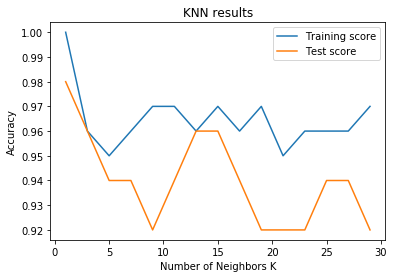

In [103]:
 # Construct plot
plt.title('KNN results')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')

# Create x-axis
xaxis = [x for x in range(1, k_max, 2)]

# Plot the test and training scores with labels
plt.plot(xaxis, train_scores, label='Training score')
plt.plot(xaxis, test_scores, label='Test score')

# Show the figure
plt.legend()
plt.show()

## Example plot

You will produce something like this as a basis for your analysis:

![Example plot](https://raw.githubusercontent.com/TimKam/knn-assignment/master/example_plot.png)

## What to hand in

Your report should contain a title page with the names and user names (``@cs``) of all group members, course name, course code, and a fancy title for your assignment. This report is not a full fledge report (i.e., you do not need to write long-winding introductions, or follow the general report structure), but you should clearly answer the assignment questions and present your results in a structured way.

Upload your report to **Labres** as a **PDF**, and **all code** used to produce your results (i.e., your adjusted copy of this notebook) as a ZIP file.